In [5]:
import os
import cv2
import tensorflow as tf
from typing import List
from matplotlib import pyplot as plt
import imageio

In [6]:
# prevent exponentional memory growth
physical_devices = tf.config.list_logical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0],True)
except:
    pass

In [3]:
# two build functions one for image and one for dataset
import gdown

url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
output = 'data.zip'
gdown.download(url,output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=05c39a12-7961-48d2-93f7-a543f4cf2d54
To: c:\Users\Aaron\OneDrive\Desktop\github\lipReadMLModel\data.zip
100%|██████████| 423M/423M [02:56<00:00, 2.40MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [7]:
def load_video(path:str) -> List[float]:
    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean),tf.float32)/std


In [8]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!1234567890"]

In [9]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="",invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'](size=40)


In [10]:
def load_alignments(path:str) -> List[str]:
    with open(path,'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens,input_encoding='UTF-8'),(-1)))[1:]

In [11]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames,alignments

In [12]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [13]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8')

'.\\data\\s1\\bbal6n.mpg'

In [14]:
frames,alignments = load_data(tf.convert_to_tensor(test_path))

tf.Tensor(
[[[1.4603739 ]
  [1.4603739 ]
  [1.4209043 ]
  ...
  [0.15787826]
  [0.19734782]
  [0.07893913]]

 [[1.4603739 ]
  [1.4603739 ]
  [1.4209043 ]
  ...
  [0.15787826]
  [0.07893913]
  [0.03946957]]

 [[1.4209043 ]
  [1.4209043 ]
  [1.3814348 ]
  ...
  [0.07893913]
  [0.07893913]
  [0.07893913]]

 ...

 [[0.94726956]
  [0.94726956]
  [0.94726956]
  ...
  [9.94633   ]
  [9.867392  ]
  [9.867392  ]]

 [[0.94726956]
  [0.94726956]
  [0.94726956]
  ...
  [9.90686   ]
  [9.867392  ]
  [9.867392  ]]

 [[0.94726956]
  [0.94726956]
  [0.94726956]
  ...
  [9.90686   ]
  [9.867392  ]
  [9.867392  ]]], shape=(46, 140, 1), dtype=float32)


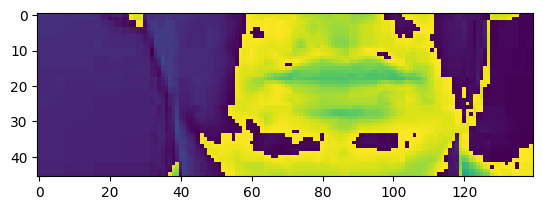

In [15]:
plt.imshow(frames[0])
print(frames[0])

In [16]:
bytes.decode(tf.strings.reduce_join([x for x in num_to_char(alignments)]).numpy())

'binblueatlsixnow'

In [17]:
# helps use to get data from file name
def mappable_function(path:str) -> List[str]:
    result = tf.py_function(load_data, [path],(tf.float32,tf.int64))
    return result

In [61]:
#make a datapipeline

data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500,reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2,padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)

train = data.take(450)
test = data.skip(450)

In [19]:
frames, alignments = data.as_numpy_iterator().next()

In [20]:
alignments

array([[ 2,  9, 14,  0,  7, 18,  5,  5, 14,  0, 23,  9, 20,  8,  0,  2,
         0,  6,  9, 22,  5,  0, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  9, 14,  0, 23,  8,  9, 20,  5,  0,  9, 14,  0, 19,  0,  5,
         9,  7,  8, 20,  0, 14, 15, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [21]:
len(frames)

2

In [22]:
test = data.as_numpy_iterator()

In [23]:
val = test.next(); 
val[0][1]

array([[[[1.4373839 ],
         [1.4373839 ],
         [1.3985357 ],
         ...,
         [9.362419  ],
         [9.634357  ],
         [9.634357  ]],

        [[1.4373839 ],
         [1.4373839 ],
         [1.3985357 ],
         ...,
         [8.818544  ],
         [9.712053  ],
         [9.634357  ]],

        [[1.2431428 ],
         [1.2431428 ],
         [1.2431428 ],
         ...,
         [9.750902  ],
         [9.828598  ],
         [9.828598  ]],

        ...,

        [[0.8935089 ],
         [0.8935089 ],
         [0.8935089 ],
         ...,
         [9.634357  ],
         [9.750902  ],
         [9.750902  ]],

        [[0.8935089 ],
         [0.8935089 ],
         [0.8935089 ],
         ...,
         [9.595509  ],
         [9.712053  ],
         [9.712053  ]],

        [[0.8935089 ],
         [0.8935089 ],
         [0.8935089 ],
         ...,
         [9.634357  ],
         [9.750902  ],
         [9.712053  ]]],


       [[[1.3985357 ],
         [1.3985357 ],
         [1.43

In [24]:
imageio.v3.imwrite('./animation.gif',val[0][0])

TypeError: Cannot handle this data type: (1, 1, 1), <f4

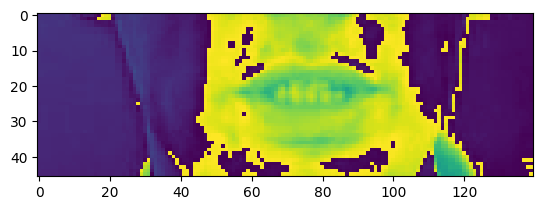

In [25]:
plt.imshow(val[0][0][30])

In [26]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][1]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bingreenintsixplease'>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D,LSTM,Dense,Dropout,Bidirectional, MaxPool3D,Reshape,SpatialDropout3D,BatchNormalization,TimeDistributed,Flatten,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [29]:
model = Sequential()
model.add(Conv3D(128,3,input_shape=(75,46,140,1),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256,3,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75,3,padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal',return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal',return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal',activation='softmax'))

In [31]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_6 (Conv3D)           (None, 75, 46, 140, 128)  3584      
                                                                 
 activation_6 (Activation)   (None, 75, 46, 140, 128)  0         
                                                                 


 max_pooling3d_6 (MaxPooling  (None, 75, 23, 70, 128)  0         
 3D)                                                             
                                                                 
 conv3d_7 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_7 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_7 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                             
                                                                 
 conv3d_8 (Conv3D)           (None, 75, 11, 35, 75)    518475    
                                                                 
 activation_8 (Activation)   (None, 75, 11, 35, 75)    0         
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 75, 5, 17, 75)    0         
 3D)      

In [32]:
# test prediction
yhat = model.predict(val[0])

1/1 [==============================] - 33s 33s/step


In [39]:
bytes.decode(tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[1]]).numpy())

'llleeeeeeeeebbbyy'

In [47]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr*tf.math.exp(-0.1)

In [56]:
def CTCLoss(y_true,y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0],dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1],dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1],dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len,1),dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len,1),dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true,y_pred,input_length,label_length)
    return loss

In [49]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self,dataset):
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None):
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat,[75,75],greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [57]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=CTCLoss)

In [58]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'),monitor='loss',save_weights_only=True)

In [59]:
schedule_callback = LearningRateScheduler(scheduler)
example_callback = ProduceExample(data)

In [62]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100
